In [54]:
import os, ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
!pwd

/rwthfs/rz/cluster/home/hd242061/mito_scaling/Tensorflow/Notebooks


### Tensorflow:
- 80 epochs with lr scheduling and linear scaling rule 
- loss as a function of epochs and loss as a function of time to converge

In [3]:
path_1 ='../Logs' 

In [4]:
names = sorted(os.listdir(path_1))  

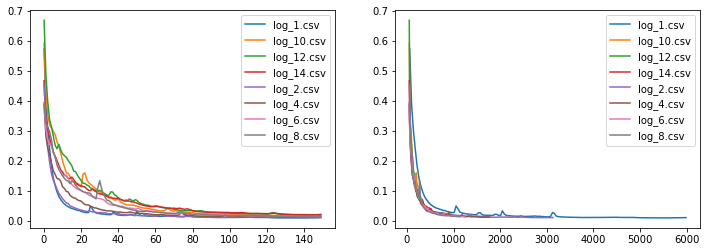

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
for i,name in enumerate(names):
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    ax1.plot(Df.loss, label=name)
    ax2.plot(Df.time_per_epoch.cumsum(), Df.loss, label=name)
#     ax2.set_ylim([0,0.5])
    
ax1.legend()
ax2.legend()

- Training time vs test time change

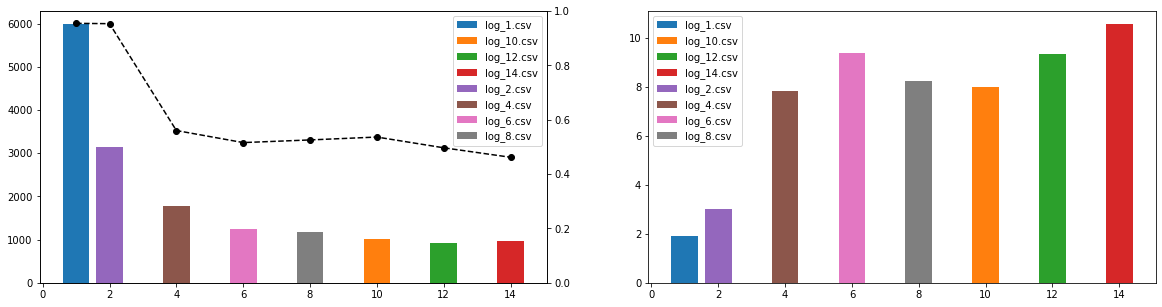

In [86]:

names = sorted(os.listdir(path_1))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
ax3 = ax1.twinx()
iou =[]
for i,name in enumerate(names):
    
    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    
    iou.append([int(name[4:-4]),Df.iou[0]])
   
    ax1.bar(int(name[4:-4]), Df.training_time[0], label=name)
    ax2.bar(int(name[4:-4]), Df.test_time[0], label=name)

iou = np.array(iou)
iou = iou[np.argsort(iou, axis=0)[:,0]]
ax3.plot(iou[:,0], iou[:,1], 'ko--')
ax3.set_ylim([0,1])

ax1.legend()
ax2.legend()


- Test set loss

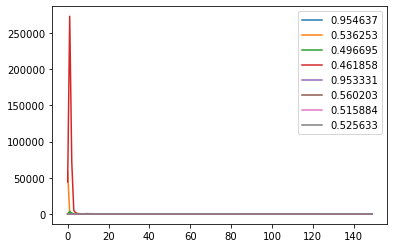

In [9]:
for i,name in enumerate(names):

    path = path_1 +'/'+names[i]
    Df = pd.read_csv(path, delimiter=',', header=0)
    plt.plot(Df.val_loss, label=Df.iou[0])
    # plt.ylim([0,0.2])
#     ax1.set_ylim([0,0.2])
#     ax2.set_ylim([0,0.2])
#     ax2.set_ylim([0,1])
    
plt.legend()
